In [55]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

#Import API key
from config import api_key

#Import citipy
from citipy import citipy

#Output File (CSV)
output_file = "final_output/cities.csv"

#Ranges for latitudes and Longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

#print(api_key)

In [56]:
#Lists for lat and longs and cities
lat_longs = []
cities = []

#Create random lat and Long value combinations
lats = np.random.uniform(lat_range[0], long_range[1], size= 2500)
longs = np.random.uniform(long_range[0], long_range[1], size= 2500)
lat_longs = zip(lats, longs)

#Identify nearest city for each combination and check if its unique
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    #If city is not already in the list then add it
    if city not in cities:
        cities.append(city)

        
#Creating smaller list of cities to test API with
mini_cities = []
mini_cities = cities[0:10]

#Print total city count
print(len(cities))
print(mini_cities)
#print(cities[0:10])

657
['mataura', 'qaanaaq', 'belushya guba', 'vardo', 'ushuaia', 'barentsburg', 'puerto escondido', 'hobart', 'longyearbyen', 'jamestown']


In [57]:
#Set url for API
url = "http://api.openweathermap.org/data/2.5/weather?"


#Set units variable to return temperature in Farenheiht 
units = "imperial"

#Create lists to hold retrived data that matches cities index
latitude_cities = []
temperatures_cities = []
humidity_cities = []
cloudiness_cities = []
wind_speed_cities = []
max_temperatures = []

final_cities = []
print("Beginning Data Retrieval")
print("--------------------------")
    

#Use cities list to loop through and search web
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
        weather_response_json = requests.get(query_url).json()
        latitude_cities.append(weather_response_json['coord']['lat'])
        temperatures_cities.append(weather_response_json['main']['temp'])
        humidity_cities.append(weather_response_json['main']['humidity'])
        cloudiness_cities.append(weather_response_json['clouds']['all'])
        wind_speed_cities.append(weather_response_json['wind']['speed'])
        max_temperatures.append(weather_response_json['main']['temp_max'])
        final_cities.append(city)
        print(f"Processing Record |{city}")
    except KeyError:
        print("City not found. Skipping...")
        

    


    
#print(latitude_cities)
#print(temperatures_cities)
#print(humidity_cities)
#print(cloudiness_cities)
#print(wind_speed_cities)


Beginning Data Retrieval
--------------------------
Processing Record |mataura
Processing Record |qaanaaq
City not found. Skipping...
Processing Record |vardo
Processing Record |ushuaia
City not found. Skipping...
Processing Record |puerto escondido
Processing Record |hobart
Processing Record |longyearbyen
Processing Record |jamestown
Processing Record |punta arenas
Processing Record |chokurdakh
Processing Record |victoria
City not found. Skipping...
Processing Record |nikolskoye
Processing Record |den helder
Processing Record |praia da vitoria
Processing Record |barrow
Processing Record |atuona
Processing Record |bredasdorp
Processing Record |rikitea
Processing Record |faanui
Processing Record |port alfred
Processing Record |tuktoyaktuk
Processing Record |talnakh
Processing Record |hermanus
Processing Record |butaritari
Processing Record |santa cruz
City not found. Skipping...
Processing Record |avera
Processing Record |cabedelo
Processing Record |eureka
Processing Record |vaini
City 

Processing Record |northam
Processing Record |laureles
Processing Record |bethanien
Processing Record |parana
Processing Record |chernyshevskiy
Processing Record |bilibino
Processing Record |northport
Processing Record |nelson bay
Processing Record |magadi
Processing Record |sao raimundo nonato
City not found. Skipping...
Processing Record |bilma
Processing Record |norrtalje
Processing Record |nouadhibou
Processing Record |kaeo
Processing Record |kloulklubed
City not found. Skipping...
Processing Record |yarada
City not found. Skipping...
City not found. Skipping...
Processing Record |dzhebariki-khaya
City not found. Skipping...
Processing Record |meulaboh
Processing Record |codrington
Processing Record |mecca
City not found. Skipping...
Processing Record |zapolyarnyy
Processing Record |vanimo
Processing Record |san patricio
Processing Record |constitucion
Processing Record |lima
Processing Record |gigmoto
Processing Record |kushmurun
Processing Record |laurel
Processing Record |rocheg

Processing Record |ewa beach
City not found. Skipping...
Processing Record |klyuchi
Processing Record |kushima
Processing Record |semey
City not found. Skipping...
Processing Record |college
Processing Record |half moon bay
Processing Record |rio tuba
City not found. Skipping...
Processing Record |rincon
Processing Record |zhezkazgan
Processing Record |ada
Processing Record |boone
Processing Record |suleja
Processing Record |eenhana
Processing Record |timiryazevskoye
Processing Record |komsomolskiy
Processing Record |portobelo
Processing Record |poya
Processing Record |paternion
Processing Record |derzhavinsk
Processing Record |kushiro
Processing Record |tabou
Processing Record |misheronskiy
Processing Record |lingao
Processing Record |ormara
Processing Record |mopti
Processing Record |moron
Processing Record |shebunino
City not found. Skipping...
Processing Record |sohag
Processing Record |churapcha
Processing Record |palafrugell
Processing Record |chhatapur
Processing Record |hobyo
C

In [ ]:
#print(len(latitude_cities))
#print(len(temperatures_cities))
#print(humidity_cities)
#print(len(humidity_cities))
#print(len(cloudiness_cities))
#print(len(wind_speed_cities))
#print(len(final_cities))

In [59]:
#Create DataFrame with retrieved data

#Creating Dictionary form lists

weather_dict = {'City':final_cities, 'Latitude': latitude_cities, 'Temp.(F)': temperatures_cities,
               'Humidity (%)': humidity_cities, 'Cloudiness(%)': cloudiness_cities, 'Wind Speed(mph)': wind_speed_cities,
               'Max Temp': max_temperatures}

weather_dict
#convert dictionary to dataframe 
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp
0,mataura,-46.19,54.77,76,100,2.64,54.77
1,qaanaaq,77.48,36.66,80,0,1.32,36.66
2,vardo,70.37,51.80,87,75,20.80,51.80
3,ushuaia,-54.80,37.40,74,20,13.87,37.40
4,puerto escondido,15.85,81.75,75,100,3.06,81.75
...,...,...,...,...,...,...,...
597,general higinio morinigo,-25.95,37.92,99,0,3.04,37.92
598,reykjavik,64.14,50.00,87,90,3.36,50.00
599,marquette,46.53,57.67,92,2,3.76,59.00
600,tekeli,44.83,68.61,30,0,4.21,68.61


In [61]:
print(len(weather_df['City']))
print(len(weather_df['Latitude']))
print(len(weather_df['Temp.(F)']))
print(len(weather_df['Humidity (%)']))
print(len(weather_df['Cloudiness(%)']))
print(len(weather_df['Wind Speed(mph)']))
print(len(weather_df['Max Temp']))

602
602
602
602
602
602
602


In [62]:
#Locate Rows where Humidity is greater than 100 and drop them
humidity_sort = weather_df.loc[weather_df['Humidity (%)'] > 100]
humidity_sort

,City,Latitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp


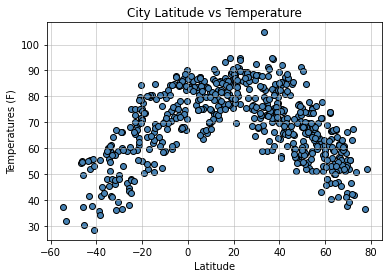

In [63]:
#Temperature vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Temp.(F)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = 'black')

#Set graph title
plt.title('City Latitude vs Temperature')

#Set x axis label
plt.xlabel('Latitude')

#Set y axis label
plt.ylabel('Temperatures (F)')

#Set lines on grid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#Save graph as .pngs
#plt.savefig()

plt.show()


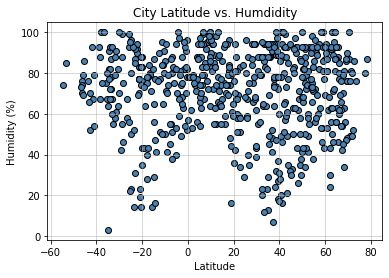

In [64]:
#Humidity vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Humidity (%)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Humdidity")

#Set x axis
plt.xlabel('Latitude')

#set y axis
plt.ylabel('Humidity (%)')

#set grid lines
plt.grid(linestyle = '-', linewidth =1, alpha = 0.5)

plt.show()

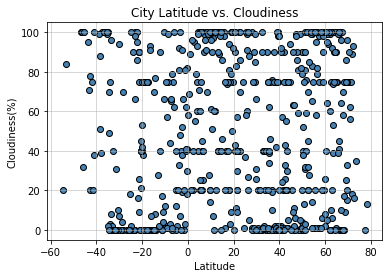

In [65]:
#Cloudiness vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness(%)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")

#Set title
plt.title("City Latitude vs. Cloudiness")

#Set x axis
plt.xlabel('Latitude')

#Set y axis
plt.ylabel('Cloudiness(%)')

#Set grid line
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

plt.show()

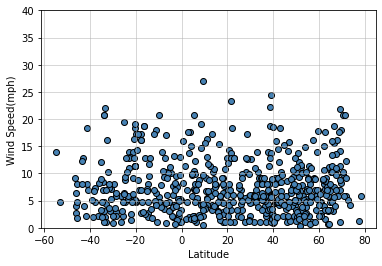

In [66]:
#Wind Speed vs Latitude Graph
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed(mph)']
plt.scatter(x_values,y_values, facecolor = "steelblue", edgecolor = "black")

#Set x axis
plt.xlabel('Latitude')

#Set y axis
plt.ylabel('Wind Speed(mph)')

#Set y axis limit
plt.ylim(0,40)

#Set grid lines
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

plt.show()

In [67]:
#Split Dataframe into North Hemisphere and South Hemisphere
northern_hemisphere = weather_df.loc[weather_df['Latitude'] > 0]
northern_hemisphere

,City,Latitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp
1,qaanaaq,77.48,36.66,80,0,1.32,36.66
2,vardo,70.37,51.80,87,75,20.80,51.80
4,puerto escondido,15.85,81.75,75,100,3.06,81.75
6,longyearbyen,78.22,51.80,87,13,5.79,51.80
7,jamestown,42.10,66.78,93,90,9.17,68.00
...,...,...,...,...,...,...,...
596,champerico,14.30,81.54,77,100,3.98,81.54
598,reykjavik,64.14,50.00,87,90,3.36,50.00
599,marquette,46.53,57.67,92,2,3.76,59.00
600,tekeli,44.83,68.61,30,0,4.21,68.61


In [98]:
#Define Function for calculating correlation coeff. and creating graph
def correlation_graph(x,y):
    print(f"The r-squared value is: {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")
    plt.annotate(line_eq,(0,25),fontsize=15, color='red')
    plt.show()
    return line_eq
    



The r-squared value is: -0.7


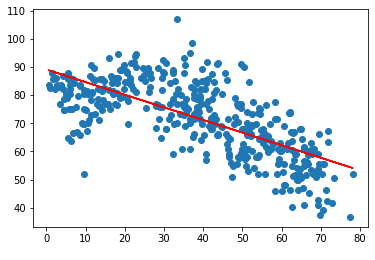

'y = -0.45x + 89.15'

In [103]:
#Linear Regression for Northern Hemisphere DataFrame (Latitude vs Max Temp)
north_temperatures = correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Max Temp'])
north_temperatures

In [101]:
#Split Dataframe into North Hemisphere and South Hemisphere
southern_hemisphere = weather_df.loc[weather_df['Latitude'] < 0]
southern_hemisphere

,City,Latitude,Temp.(F),Humidity (%),Cloudiness(%),Wind Speed(mph),Max Temp
0,mataura,-46.19,54.77,76,100,2.64,54.77
3,ushuaia,-54.80,37.40,74,20,13.87,37.40
5,hobart,-42.88,55.53,52,20,12.75,55.99
8,punta arenas,-53.15,32.00,85,84,4.70,32.00
15,atuona,-9.80,79.52,71,2,20.78,79.52
...,...,...,...,...,...,...,...
589,rio brilhante,-21.80,55.26,69,16,4.68,55.26
590,kendari,-3.94,84.33,59,92,3.76,84.33
594,kindu,-2.95,67.30,49,0,0.72,67.30
595,djambala,-2.54,67.93,75,91,3.96,67.93


The r-squared value is: 0.74


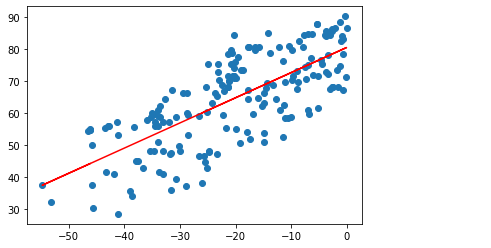

'y = 0.79x + 80.42'

In [104]:
#Linear Regression for Southern Hemisphere DataFrame (Latitude vs Max Temp)
south_temperatures = correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Max Temp'])
south_temperatures

The r-squared value is: -0.08


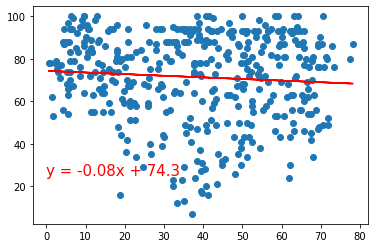

'y = -0.08x + 74.3'

In [105]:
#Latitude vs Humidity

#North
north_humidity= correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Humidity (%)'])
north_humidity


The r-squared value is: -0.05


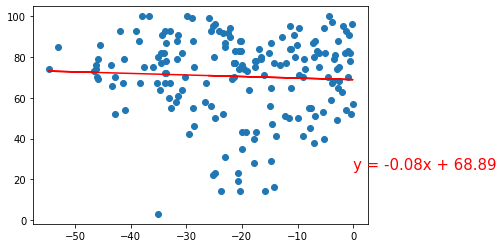

'y = -0.08x + 68.89'

In [106]:
#south
south_humidity= correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Humidity (%)'])
south_humidity

The r-squared value is: -0.1


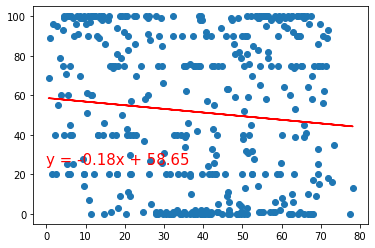

'y = -0.18x + 58.65'

In [108]:
#Latitude vs Cloudiness
#North
north_humidity= correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Cloudiness(%)'])
north_humidity

The r-squared value is: -0.15


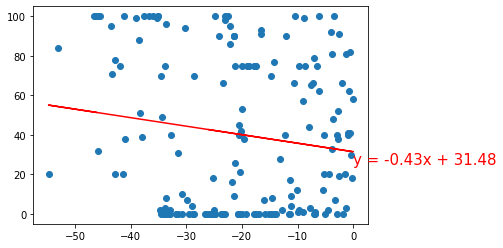

'y = -0.43x + 31.48'

In [109]:
#South
south_humidity= correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Cloudiness(%)'])
south_humidity

The r-squared value is: 0.02


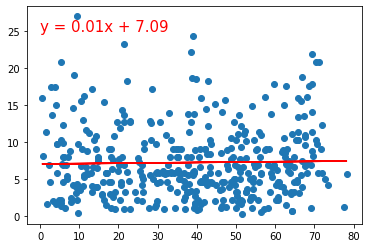

'y = 0.01x + 7.09'

In [110]:
#Latitude vs Wind Speed
#North
north_humidity= correlation_graph(northern_hemisphere['Latitude'],northern_hemisphere['Wind Speed(mph)'])
north_humidity

The r-squared value is: -0.03


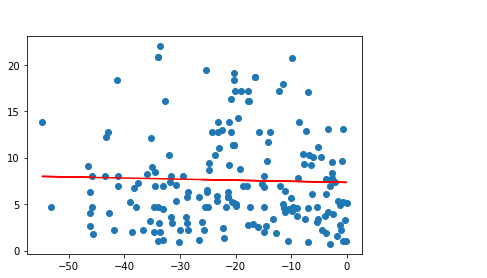

'y = -0.01x + 7.34'

In [111]:
#South
south_humidity= correlation_graph(southern_hemisphere['Latitude'],southern_hemisphere['Wind Speed(mph)'])
south_humidity